#Perform Data preprocessing on Titanic dataset 15th Sept Assignment

Data Preprocessing

    o	Import the Libraries.


In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


    o	Importing the dataset.

In [52]:
df=pd.read_csv("Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [54]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [55]:
df.shape

(891, 12)

    o	Checking for Null Values.


In [56]:
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [57]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Dropping all the irrevelant columns -- Cabin is also dropped as 77% of the data has null values

In [58]:
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1, inplace = True)

In [59]:
df["Age"].fillna(df["Age"].mean(), inplace=True)

In [60]:
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

In [61]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


In [62]:
df.isnull().any()

Survived    False
Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Fare        False
Embarked    False
dtype: bool

    o	Data Visualization.


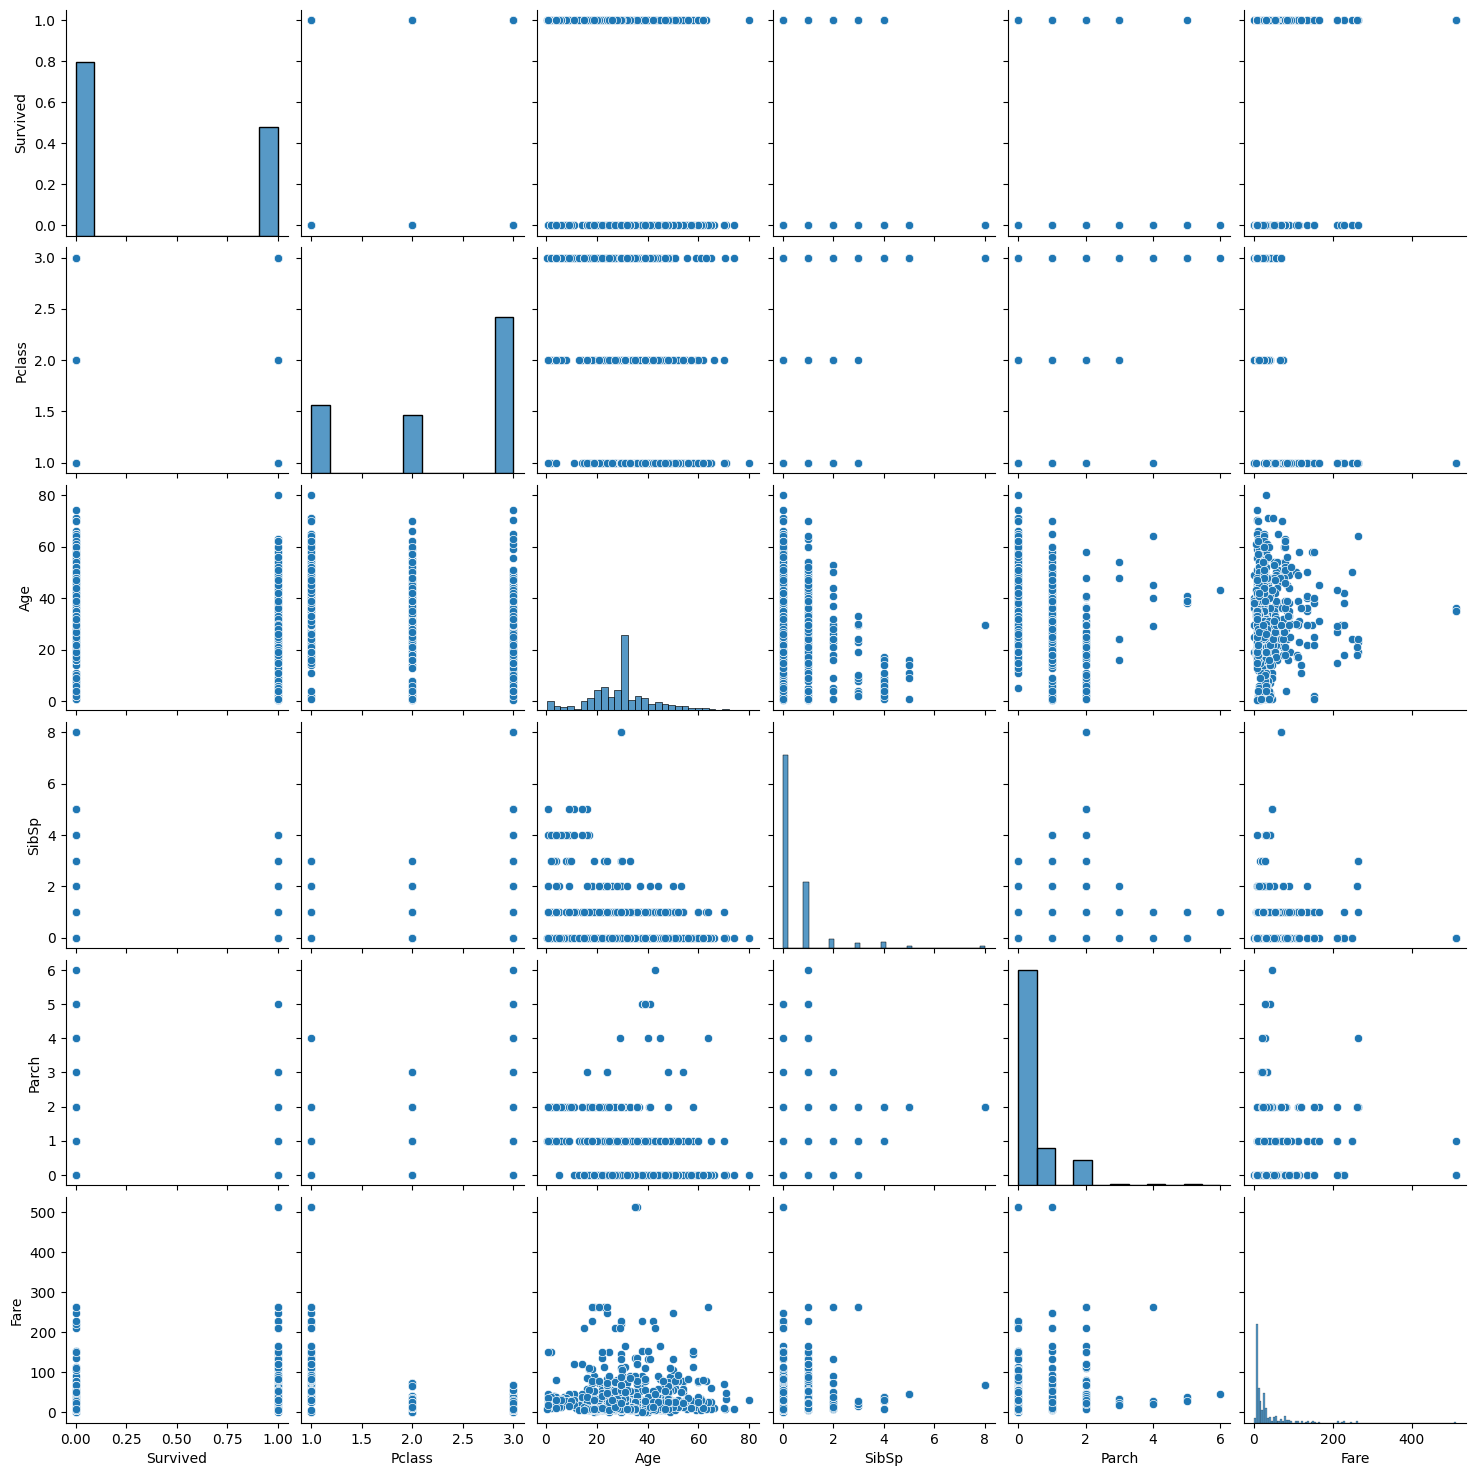

In [63]:
sns.pairplot(df)

<ipython-input-64-cf0334540b62>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Age"])


<Axes: xlabel='Age', ylabel='Density'>

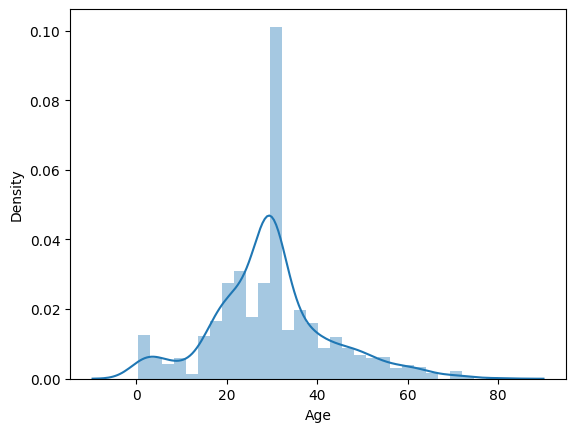

In [64]:
sns.distplot(df["Age"])

In [65]:
df.corr()

<ipython-input-65-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


<ipython-input-66-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

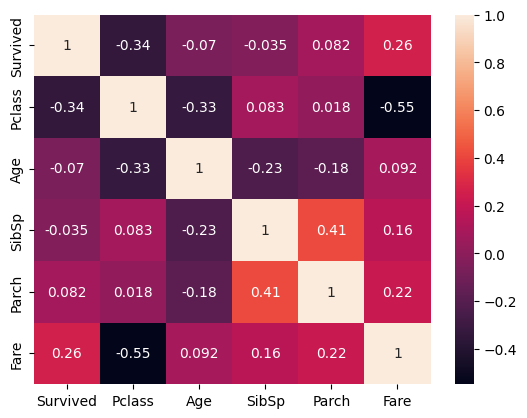

In [66]:
sns.heatmap(df.corr(),annot=True)

    o	Outlier Detection


<Axes: >

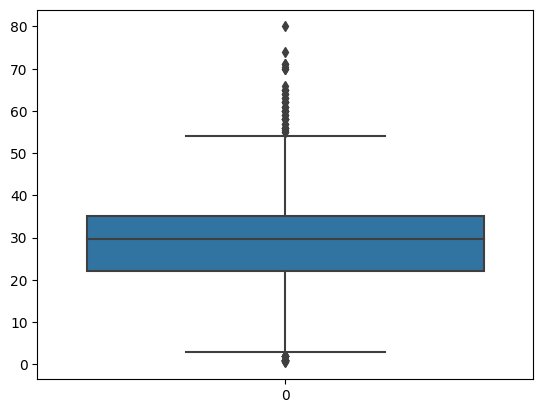

In [67]:
sns.boxplot(df.Age)

<Axes: >

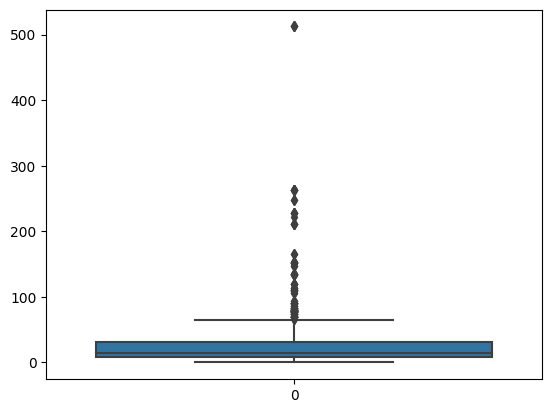

In [68]:
sns.boxplot(df.Fare)

<Axes: >

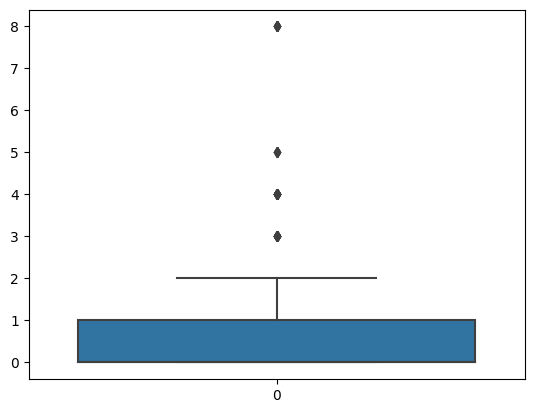

In [69]:
sns.boxplot(df.SibSp)

<Axes: >

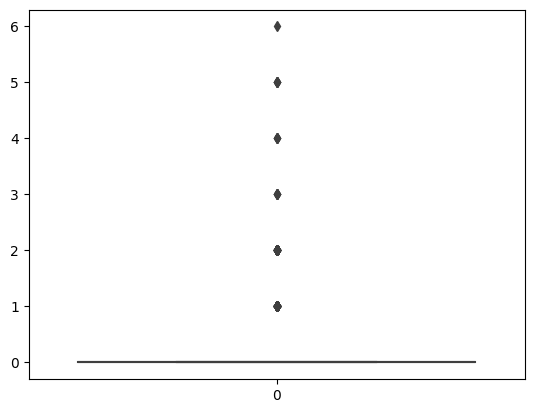

In [70]:
sns.boxplot(df.Parch)

In [71]:
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
df['Fare']=np.where(df['Fare']>upper_whisker,upper_whisker,np.where(df['Fare']<lower_whisker,lower_whisker,df['Fare']))

<Axes: >

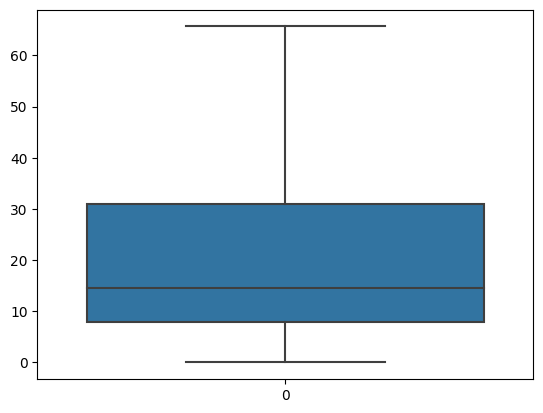

In [72]:
sns.boxplot(df.Fare)

In [73]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
df['Age']=np.where(df['Age']>upper_whisker,upper_whisker,np.where(df['Age']<lower_whisker,lower_whisker,df['Age']))

<Axes: >

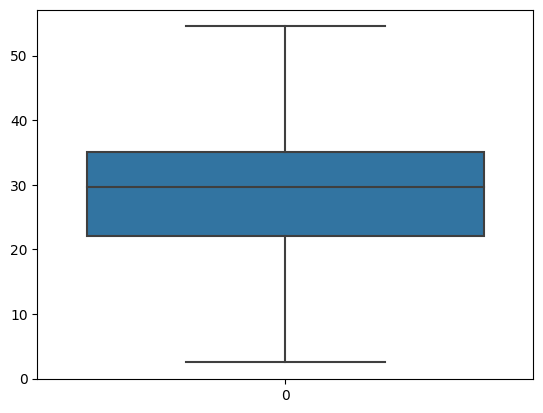

In [74]:
sns.boxplot(df.Age)

In [75]:
Q1 = df['SibSp'].quantile(0.25)
Q3 = df['SibSp'].quantile(0.75)
IQR = Q3 - Q1
d = 1.5
lower_lim = Q1 - (d*IQR)
upper_lim = Q3 + (d*IQR)
df['SibSp']=np.where(df['SibSp']>upper_lim,upper_lim,np.where(df['SibSp']<lower_lim,lower_lim,df['SibSp']))


<Axes: >

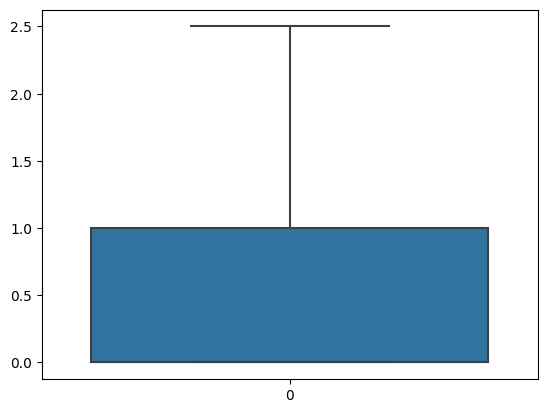

In [76]:
sns.boxplot(df.SibSp)

In [77]:
Q1 = df['Parch'].quantile(0.25)
Q3 = df['Parch'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
df['Parch']=np.where(df['Parch']>upper_whisker,upper_whisker,np.where(df['Parch']<lower_whisker,lower_whisker,df['Parch']))

<Axes: >

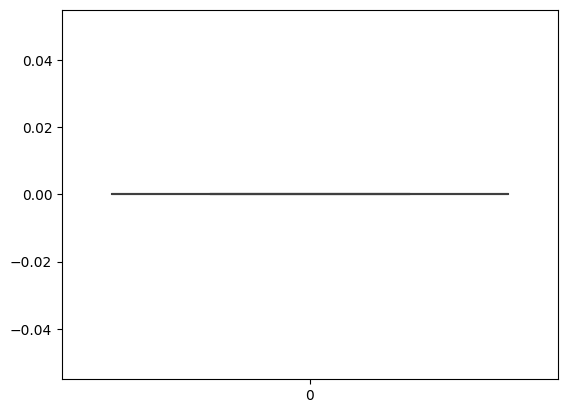

In [78]:
sns.boxplot(df.Parch)

In [79]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1.0,0.0,7.2500,S
1,1,1,female,38.000000,1.0,0.0,65.6344,C
2,1,3,female,26.000000,0.0,0.0,7.9250,S
3,1,1,female,35.000000,1.0,0.0,53.1000,S
4,0,3,male,35.000000,0.0,0.0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0.0,0.0,13.0000,S
887,1,1,female,19.000000,0.0,0.0,30.0000,S
888,0,3,female,29.699118,1.0,0.0,23.4500,S
889,1,1,male,26.000000,0.0,0.0,30.0000,C


<Axes: >

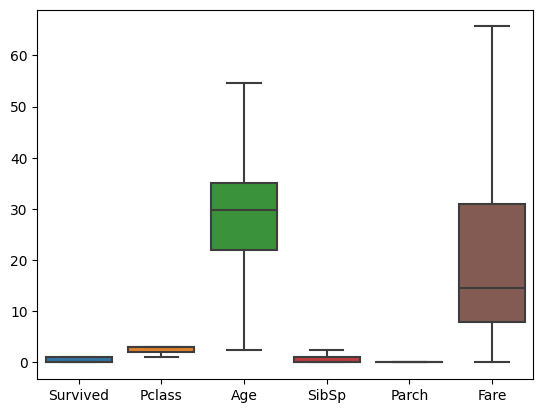

In [80]:
sns.boxplot(df)


    o	Splitting Dependent and Independent variables


In [82]:
x = df.drop(columns = ["Survived"], axis = 1) # Independent variables in the form of 2-D array
y = df["Survived"] # Survived column is the only dependent varaible here

In [83]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1.0,0.0,7.2500,S
1,1,female,38.0,1.0,0.0,65.6344,C
2,3,female,26.0,0.0,0.0,7.9250,S
3,1,female,35.0,1.0,0.0,53.1000,S
4,3,male,35.0,0.0,0.0,8.0500,S


In [84]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

    o	Perform Encoding


In [85]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x["Sex"] = le.fit_transform(x["Sex"])
x["Embarked"] = le.fit_transform(x["Embarked"])

In [86]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1.0,0.0,7.2500,2
1,1,0,38.0,1.0,0.0,65.6344,0
2,3,0,26.0,0.0,0.0,7.9250,2
3,1,0,35.0,1.0,0.0,53.1000,2
4,3,1,35.0,0.0,0.0,8.0500,2


    o	Feature Scaling -- Bringing all the independent variables in a single scalable format in order to process them from sklearn.preprocessing import MinMaxScaler



In [87]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()

In [88]:
x_scaled = pd.DataFrame(ms.fit_transform(x), columns = x.columns)

In [89]:
x_scaled.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1.0,1.0,0.375000,0.4,0.0,0.110460,1.0
1,0.0,0.0,0.682692,0.4,0.0,1.000000,0.0
2,1.0,0.0,0.451923,0.0,0.0,0.120745,1.0
3,0.0,0.0,0.625000,0.4,0.0,0.809027,1.0
4,1.0,1.0,0.625000,0.0,0.0,0.122649,1.0


    o	Splitting Data into Train and Test

In [90]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size =0.2,random_state =0)

In [91]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(712, 7) (179, 7) (712,) (179,)


In [92]:
x_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
140,1.0,0.0,0.523060,0.0,0.0,0.232284,0.0
439,0.5,1.0,0.548077,0.0,0.0,0.159977,1.0
817,0.5,1.0,0.548077,0.4,0.0,0.563793,0.0
378,1.0,1.0,0.336538,0.0,0.0,0.061134,0.0
491,1.0,1.0,0.355769,0.0,0.0,0.110460,1.0


In [93]:
x_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
495,1.0,1.0,0.523060,0.0,0.0,0.220285,0.0
648,1.0,1.0,0.523060,0.0,0.0,0.115031,1.0
278,1.0,1.0,0.086538,1.0,0.0,0.443746,0.5
31,0.0,0.0,0.523060,0.4,0.0,1.000000,0.0
255,1.0,0.0,0.509615,0.0,0.0,0.232284,0.0


In [94]:
y_train.head()

140    0
439    0
817    0
378    0
491    0
Name: Survived, dtype: int64

In [95]:
y_test.head()

495    0
648    0
278    0
31     1
255    1
Name: Survived, dtype: int64